In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import itertools
import random
random.seed(108448)
from scipy.stats import poisson

#%pip install gurobipy
import gurobipy as gp
from gurobipy import GRB

In [275]:
#Define the number of elememts in each set I, J, K
i_num = 20
k_num = 1
j_num = 300 #Without I and K, so real j_num_real = j_num + i_num + k_num

#Define empty data frames
I = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])
J = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])
K = pd.DataFrame(columns = ['Point number', 'Latitude', 'Longtitude'])


In [276]:
#Define sets of I, J, K, where J contains I and K

for i in range(i_num):
    I.loc[i, 'Point number'] = 'i'+ str(i)
    I.loc[i, 'Latitude'] = round(random.uniform(0, 100), 4)
    I.loc[i, 'Longtitude'] = round(random.uniform(0, 100), 4)

I.index = I['Point number']
    
    
for k in range(k_num):
    K.loc[k, 'Point number'] = 'k'+ str(k)
    K.loc[k, 'Latitude'] = round(random.uniform(0, 100), 4)
    K.loc[k, 'Longtitude'] = round(random.uniform(0, 100), 4)

K.index = K['Point number']


for j in range(j_num):
    J.loc[j, 'Point number'] = 'j'+ str(j)
    J.loc[j, 'Latitude'] = round(random.uniform(0, 100), 4)
    J.loc[j, 'Longtitude'] = round(random.uniform(0, 100), 4)

J.index = J['Point number'] 
J = pd.concat([J, K, I], axis = 0) #Include K to J
I.index

Index(['i0', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9', 'i10',
       'i11', 'i12', 'i13', 'i14', 'i15', 'i16', 'i17', 'i18', 'i19'],
      dtype='object', name='Point number')

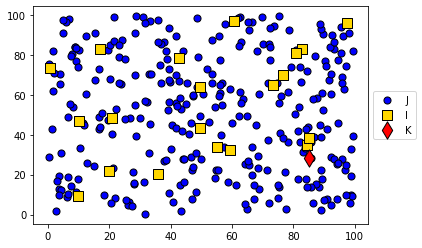

In [277]:
plt.scatter(J['Latitude'], J['Longtitude'], color = 'blue', edgecolors = 'black',
            marker = 'o', s = 50, label = 'J')
plt.scatter(I['Latitude'], I['Longtitude'], color = 'gold', edgecolors = 'black',
            marker = 's', s = 100, label = 'I')
plt.scatter(K['Latitude'], K['Longtitude'], color = 'red', edgecolors = 'black',
            marker = 'd', s = 150, label = 'K')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [278]:
#Define constants

B = 100
S = 20
alpha = 10

beta = {}
for j in J.index:
    if j.startswith('j'):
        beta[j] = 400
    else:
        beta[j] = 400
        
q_j = {j: 50 for j in J.index}
up_bound = 12
mu = {i : int(round(random.uniform(0, up_bound), 0)) for i in I.index}

mu

{'i0': 5,
 'i1': 11,
 'i2': 1,
 'i3': 6,
 'i4': 6,
 'i5': 7,
 'i6': 10,
 'i7': 2,
 'i8': 9,
 'i9': 3,
 'i10': 10,
 'i11': 3,
 'i12': 12,
 'i13': 6,
 'i14': 10,
 'i15': 1,
 'i16': 7,
 'i17': 3,
 'i18': 12,
 'i19': 3}

Deterministic model

In [279]:
theta_det = {}
for n in I.index:
    theta_det[n] = list(poisson.rvs(mu[n], size = 1))[0]
theta_det

{'i0': 5,
 'i1': 15,
 'i2': 1,
 'i3': 6,
 'i4': 9,
 'i5': 5,
 'i6': 8,
 'i7': 3,
 'i8': 10,
 'i9': 3,
 'i10': 9,
 'i11': 3,
 'i12': 13,
 'i13': 3,
 'i14': 7,
 'i15': 0,
 'i16': 8,
 'i17': 6,
 'i18': 6,
 'i19': 0}

In [280]:
#Define distance matrices

def distance(point1, PointsSet1, point2, PointsSet2):
    c1 = np.array((PointsSet1.loc[point1, 'Latitude'], PointsSet1.loc[point1, 'Longtitude']))
    c2 = np.array((PointsSet2.loc[point2, 'Latitude'], PointsSet2.loc[point2, 'Longtitude']))
    return np.linalg.norm(c1-c2)

dist_JI = {(c1, c2): distance(c1, J, c2, I)for c1, c2 in itertools.product(J.index, I.index)}
dist_IK = {(c1, c2): distance(c1, I, c2, K)for c1, c2 in itertools.product(I.index, K.index)}
dist_KJ = {(c1, c2): distance(c1, K, c2, J)for c1, c2 in itertools.product(K.index, J.index)}
 
dist_KJ


{('k0', 'j0'): 0.7038110897108715,
 ('k0', 'j1'): 61.63185199391626,
 ('k0', 'j2'): 24.640246181602976,
 ('k0', 'j3'): 61.32478256700141,
 ('k0', 'j4'): 81.02850557180479,
 ('k0', 'j5'): 22.68038149238236,
 ('k0', 'j6'): 21.246853083221527,
 ('k0', 'j7'): 20.553040081214252,
 ('k0', 'j8'): 22.49928410261091,
 ('k0', 'j9'): 64.20516841890534,
 ('k0', 'j10'): 11.54995390337122,
 ('k0', 'j11'): 40.42932303613307,
 ('k0', 'j12'): 10.662457088776483,
 ('k0', 'j13'): 35.80069974246313,
 ('k0', 'j14'): 36.65662633590276,
 ('k0', 'j15'): 49.01167981216314,
 ('k0', 'j16'): 57.46364507208013,
 ('k0', 'j17'): 74.48550248054987,
 ('k0', 'j18'): 15.552529815113685,
 ('k0', 'j19'): 38.588013090595894,
 ('k0', 'j20'): 21.152521540941635,
 ('k0', 'j21'): 82.83783882242463,
 ('k0', 'j22'): 72.37686257099018,
 ('k0', 'j23'): 70.81371710692781,
 ('k0', 'j24'): 104.76623322927097,
 ('k0', 'j25'): 24.54820101371993,
 ('k0', 'j26'): 69.90855526300054,
 ('k0', 'j27'): 16.69475911925655,
 ('k0', 'j28'): 3.727

In [281]:
#Define set L
L = list()
for k, j in itertools.product(K.index, J.index):
    if dist_KJ[(k, j)] <= 0.5*B:
        L.append((k, j))
        
L

[('k0', 'j0'),
 ('k0', 'j2'),
 ('k0', 'j5'),
 ('k0', 'j6'),
 ('k0', 'j7'),
 ('k0', 'j8'),
 ('k0', 'j10'),
 ('k0', 'j11'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j15'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j25'),
 ('k0', 'j27'),
 ('k0', 'j28'),
 ('k0', 'j29'),
 ('k0', 'j30'),
 ('k0', 'j31'),
 ('k0', 'j33'),
 ('k0', 'j34'),
 ('k0', 'j37'),
 ('k0', 'j39'),
 ('k0', 'j44'),
 ('k0', 'j45'),
 ('k0', 'j47'),
 ('k0', 'j50'),
 ('k0', 'j54'),
 ('k0', 'j59'),
 ('k0', 'j62'),
 ('k0', 'j63'),
 ('k0', 'j66'),
 ('k0', 'j69'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j74'),
 ('k0', 'j75'),
 ('k0', 'j76'),
 ('k0', 'j77'),
 ('k0', 'j78'),
 ('k0', 'j80'),
 ('k0', 'j86'),
 ('k0', 'j90'),
 ('k0', 'j92'),
 ('k0', 'j93'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j98'),
 ('k0', 'j99'),
 ('k0', 'j100'),
 ('k0', 'j101'),
 ('k0', 'j105'),
 ('k0', 'j108'),
 ('k0', 'j110'),
 ('k0', 'j111'),
 ('k0', 'j115'),
 ('k0', 'j123'),
 ('k0', 'j128'),
 ('k0

In [282]:
#Define sets M_kj

M_kj = {}
M_interim = []

for (k, j) in L:
    for i in I.index:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                M_interim.append(i)
    M_kj[(k, j)] = M_interim
    M_interim = []

M_kj_interim = {key : val for key, val in M_kj.items() if val != []}  

KJ_feas = list(M_kj_interim.keys())
KJ_feas


[('k0', 'j0'),
 ('k0', 'j2'),
 ('k0', 'j7'),
 ('k0', 'j10'),
 ('k0', 'j12'),
 ('k0', 'j13'),
 ('k0', 'j14'),
 ('k0', 'j18'),
 ('k0', 'j19'),
 ('k0', 'j20'),
 ('k0', 'j27'),
 ('k0', 'j28'),
 ('k0', 'j29'),
 ('k0', 'j30'),
 ('k0', 'j31'),
 ('k0', 'j33'),
 ('k0', 'j34'),
 ('k0', 'j37'),
 ('k0', 'j39'),
 ('k0', 'j44'),
 ('k0', 'j45'),
 ('k0', 'j47'),
 ('k0', 'j63'),
 ('k0', 'j66'),
 ('k0', 'j69'),
 ('k0', 'j71'),
 ('k0', 'j72'),
 ('k0', 'j74'),
 ('k0', 'j77'),
 ('k0', 'j78'),
 ('k0', 'j86'),
 ('k0', 'j92'),
 ('k0', 'j94'),
 ('k0', 'j95'),
 ('k0', 'j96'),
 ('k0', 'j97'),
 ('k0', 'j99'),
 ('k0', 'j100'),
 ('k0', 'j105'),
 ('k0', 'j108'),
 ('k0', 'j110'),
 ('k0', 'j111'),
 ('k0', 'j115'),
 ('k0', 'j128'),
 ('k0', 'j129'),
 ('k0', 'j136'),
 ('k0', 'j138'),
 ('k0', 'j144'),
 ('k0', 'j149'),
 ('k0', 'j150'),
 ('k0', 'j153'),
 ('k0', 'j157'),
 ('k0', 'j164'),
 ('k0', 'j165'),
 ('k0', 'j171'),
 ('k0', 'j172'),
 ('k0', 'j178'),
 ('k0', 'j179'),
 ('k0', 'j182'),
 ('k0', 'j187'),
 ('k0', 'j191'),
 ('

In [283]:
#Define sets N_i

N_i = {}
N_interim = []

for i in I.index:
    for (k, j) in L:
        if dist_JI[j, i] <= S:
            if dist_JI[j, i] + dist_IK[i, k] + dist_KJ[k, j] <= B:
                N_interim.append((k, j))
    N_i[i] = N_interim
    N_interim = []
    
N_i_interim = {key : val for key, val in N_i.items() if val != []}   
 
I_feas = list(N_i_interim.keys())

In [284]:
model_det = gp.Model('Deterministic model')

x_ikj = model_det.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_det.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')

In [285]:
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i[i]) >= theta_det[i] for i in I_feas), name = 'c2')
model_det.addConstrs((gp.quicksum(x_ikj[i, k, j] for i in M_kj[(k, j)]) <= q_j[j] * y_j[j] for (k, j) in KJ_feas), name = 'c4')
model_det.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * y_j[j] <= B
                  for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c5')
model_det.addConstrs((dist_JI[(j, i)] * y_j[j] <= S for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c6')

{}

In [286]:
model_det.setObjective(alpha * gp.quicksum(x_ikj) + gp.quicksum(beta[j] * y_j[j] for j in J.index), GRB.MINIMIZE)
model_det.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 115 rows, 3341 columns and 595 nonzeros
Model fingerprint: 0xe7415c97
Variable types: 0 continuous, 3341 integer (321 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 2e+01]
Found heuristic solution: objective 3290.0000000
Presolve removed 40 rows and 3136 columns
Presolve time: 0.00s
Presolved: 75 rows, 205 columns, 339 nonzeros
Found heuristic solution: objective 2490.0000000
Variable types: 0 continuous, 205 integer (71 binary)

Root relaxation: objective 1.290000e+03, 96 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | 

In [287]:
def ListSolution(model):
        nSolutions = model.SolCount
        print('Number of solutions found: ' + str(nSolutions))
        for e in range(nSolutions):
        #for iter2 in range(1):
                model.setParam(GRB.Param.SolutionNumber, e)
                print(e)
                print('%g ' % model.PoolObjVal, end='\n')
                for v in model.getVars():
                        if v.X > 0:
                                print ('%s %g' % (v.varName, v.X))
                                #print(v)
                print("\n")
                
        print("\n")
        
ListSolution(model_det)

Number of solutions found: 3
0
1290 
x_ikj[i0,k0,j74] 5
x_ikj[i1,k0,j19] 15
x_ikj[i3,k0,j74] 6
x_ikj[i4,k0,j74] 9
x_ikj[i5,k0,j74] 5
x_ikj[i11,k0,j19] 3
x_ikj[i18,k0,j19] 6
y_j[j19] 1
y_j[j74] 1


1
2490 
x_ikj[i0,k0,j74] 5
x_ikj[i1,k0,j19] 15
x_ikj[i3,k0,j74] 6
x_ikj[i4,k0,j74] 9
x_ikj[i5,k0,j74] 5
x_ikj[i11,k0,j19] 3
x_ikj[i18,k0,j19] 6
y_j[j19] 1
y_j[j74] 1


2
3290 
x_ikj[i0,k0,j74] 5
x_ikj[i1,k0,j19] 15
x_ikj[i3,k0,j74] 6
x_ikj[i4,k0,j74] 9
x_ikj[i5,k0,j74] 5
x_ikj[i11,k0,j19] 3
x_ikj[i18,k0,j19] 6
y_j[j19] 1
y_j[j74] 1






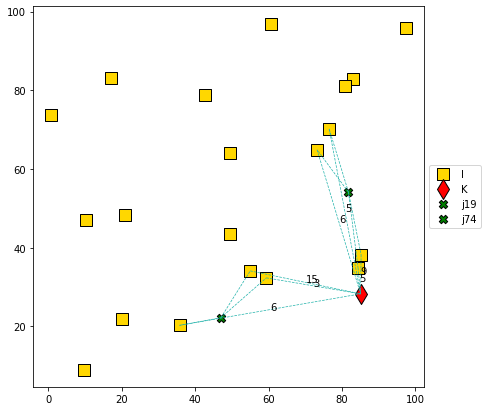

In [288]:
def SolutionGraph(I, K, J, model):
        
        axs, fig = plt.subplots(1, 1, figsize = (7, 7))
                
        fig.scatter(I['Latitude'], I['Longtitude'], color = 'gold', edgecolors = 'black',
                                marker = 's', s = 150, label = 'I')
        fig.scatter(K['Latitude'], K['Longtitude'], color = 'red', edgecolors = 'black',
                                marker = 'd', s = 200, label = 'K')
       
        model.setParam(GRB.Param.SolutionNumber, 0)
        for v in model.getVars():
                if v.xn > 0:
                        if v.varName.startswith('x_ikj'):
                                indices_x = v.varName[6:-1].split(',') #drop variable name and brackets and convert to a list of indices
                                fig.plot((J.loc[indices_x[2], 'Latitude'], I.loc[indices_x[0], 'Latitude']),
                                        (J.loc[indices_x[2], 'Longtitude'], I.loc[indices_x[0], 'Longtitude']),
                                        color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                                fig.plot((I.loc[indices_x[0], 'Latitude'], K.loc[indices_x[1], 'Latitude']),
                                        (I.loc[indices_x[0], 'Longtitude'], K.loc[indices_x[1], 'Longtitude']),
                                        color = 'lightseagreen', linestyle = "--", linewidth = 0.7)
                                fig.annotate(str(int(v.xn)), xy = ((K.loc[indices_x[1], 'Latitude'] + I.loc[indices_x[0], 'Latitude'])/2,
                                                                (K.loc[indices_x[1], 'Longtitude'] + I.loc[indices_x[0], 'Longtitude'])/2))
                        else:
                                index_y = v.varName[4:-1]
                                fig.scatter(J.loc[index_y, 'Latitude'], J.loc[index_y, 'Longtitude'], color = 'green',
                                        edgecolors = 'black', s = 70, marker = 'X', label = index_y)
                fig.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
    

SolutionGraph(I, K, J, model_det)

In [289]:
for v in model_det.getVars():
        if v.xn > 0:
            if v.varName.startswith('x_ikj'):
                indices_x = v.varName[6:-1].split(',')
indices_x

['i18', 'k0', 'j19']

Probabilistic model

In [290]:
#Define constants and random variables

theta_ran_i = {}
for n in list(I.index):
    theta_ran_i[n] = poisson(mu[n])

p = 0.99

l_i = {}
for i in theta_ran_i.keys():
    l_i[i] = int(theta_ran_i[i].ppf(p))

g_i = {}
for i in theta_ran_i.keys():
    g_i[i] = up_bound * 4

IG = []
for i in I.index:
    for g in range(1, g_i[i] + 1):
        IG.append((i, g))

I_feasG = []
for i in I_feas:
    for g in range(1, g_i[i] + 1):
        I_feasG.append((i, g))
        

h_ig = {}
for (i, g) in IG:
    h_ig[(i, g)] = math.log(theta_ran_i[i].cdf(l_i[i] + g)) - math.log(theta_ran_i[i].cdf(l_i[i] + g - 1))


phi = float(math.log(p) - sum(theta_ran_i[i].cdf(l_i[i]) for i in I_feas))

In [291]:
model_prob = gp.Model('Probabilistic model without relaxation')

x_ikj = model_prob.addVars(I.index, L, vtype = GRB.INTEGER, name = 'x_ikj')
y_j = model_prob.addVars(J.index, vtype = GRB.BINARY, name = 'y_j')
z_ig = model_prob.addVars(IG, vtype = GRB.BINARY, name = 'z_ig')

In [292]:
#Probabilistic constraints

model_prob.addConstr((gp.quicksum(h_ig[ig] * z_ig[ig] for ig in I_feasG)) >= phi, name = 'c15')
model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for (k, j) in N_i[i]) == l_i[i] + gp.quicksum(z_ig) for (i, g) in I_feasG), name = 'c16')

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


{('i0', 1): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 2): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 3): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 4): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 5): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 6): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 7): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 8): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 9): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 10): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 11): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 12): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 13): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 14): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 15): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 16): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 17): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 18): <gurobi.Constr *Awaiting Model Update*>,
 ('i0', 19): <gurobi.Constr *Awaiting

In [293]:
#Same constraints as in the deterministic model

model_prob.addConstrs((gp.quicksum(x_ikj[i, k, j] for i in M_kj[(k, j)]) <= q_j[j] * y_j[j] for (k, j) in KJ_feas), name = 'c17')
model_prob.addConstrs(((dist_JI[(j, i)] + dist_IK[(i, k)] + dist_KJ[(k, j)]) * y_j[j] <= B
                  for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c18')
model_prob.addConstrs((dist_JI[(j, i)] * y_j[j] <= S for (k, j) in N_i[i] for i in M_kj[(k, j)]), name = 'c19')

{}

In [294]:
model_prob.setObjective(alpha * gp.quicksum(x_ikj) + gp.quicksum(beta[j] * y_j[j] for j in J.index), GRB.MINIMIZE)
model_prob.optimize()

Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 492 rows, 4301 columns and 380863 nonzeros
Model fingerprint: 0x245efaa2
Variable types: 0 continuous, 4301 integer (1281 binary)
Coefficient statistics:
  Matrix range     [1e-13, 5e+01]
  Objective range  [1e+01, 4e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 2e+01]
Found heuristic solution: objective 4110.0000000
Presolve removed 377 rows and 3949 columns
Presolve time: 0.20s
Presolved: 115 rows, 352 columns, 603 nonzeros
Variable types: 0 continuous, 352 integer (107 binary)

Root relaxation: objective 1.638000e+03, 212 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time


In [295]:
ListSolution(model_prob)

Number of solutions found: 5
0
2110 
x_ikj[i0,k0,j74] 10
x_ikj[i1,k0,j19] 18
x_ikj[i3,k0,j74] 11
x_ikj[i4,k0,j74] 11
x_ikj[i5,k0,j74] 12
x_ikj[i11,k0,j19] 7
x_ikj[i15,k0,j178] 3
x_ikj[i18,k0,j19] 19
y_j[j19] 1
y_j[j74] 1
y_j[j178] 1


1
2510 
x_ikj[i0,k0,j74] 10
x_ikj[i1,k0,j19] 18
x_ikj[i3,k0,j74] 11
x_ikj[i4,k0,j74] 11
x_ikj[i5,k0,j74] 12
x_ikj[i11,k0,j19] 7
x_ikj[i15,k0,j178] 3
x_ikj[i18,k0,j19] 19
y_j[j19] 1
y_j[j74] 1
y_j[j178] 1


2
2910 
x_ikj[i0,k0,j74] 10
x_ikj[i1,k0,j19] 18
x_ikj[i3,k0,j74] 11
x_ikj[i4,k0,j74] 11
x_ikj[i5,k0,j74] 12
x_ikj[i11,k0,j19] 7
x_ikj[i15,k0,j178] 3
x_ikj[i18,k0,j19] 19
y_j[j19] 1
y_j[j74] 1
y_j[j178] 1


3
3310 
x_ikj[i0,k0,j74] 10
x_ikj[i1,k0,j19] 18
x_ikj[i3,k0,j74] 11
x_ikj[i4,k0,j74] 11
x_ikj[i5,k0,j74] 12
x_ikj[i11,k0,j19] 7
x_ikj[i15,k0,j178] 3
x_ikj[i18,k0,j19] 19
y_j[j19] 1
y_j[j74] 1
y_j[j178] 1


4
4110 
x_ikj[i0,k0,j74] 10
x_ikj[i1,k0,j19] 18
x_ikj[i3,k0,j74] 11
x_ikj[i4,k0,j74] 11
x_ikj[i5,k0,j74] 12
x_ikj[i11,k0,j19] 7
x_ikj[i15,k0,j178] 

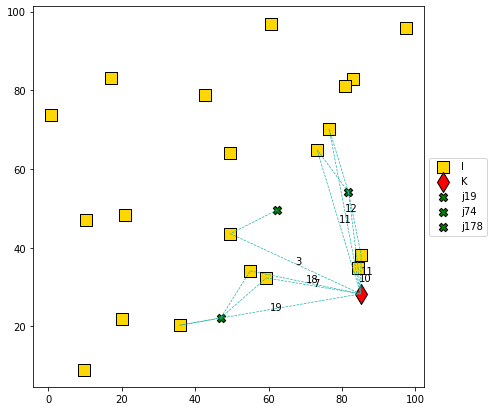

In [296]:
SolutionGraph(I, K, J, model_prob)

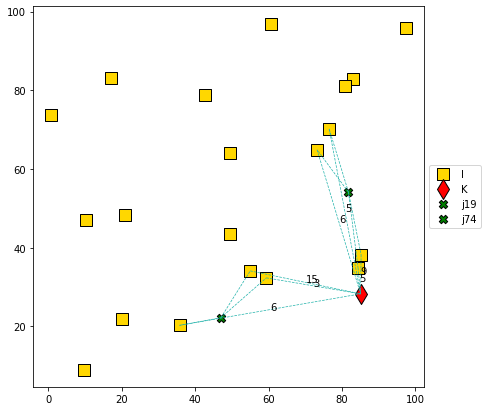

In [297]:
SolutionGraph(I, K, J, model_det)

1) complete information optimum - lower bound for optimum
2) price of uncertainty